# M1S2: Spotify top 50 tracks of 2020 data analysis report

# Content
[Introduction](#Introduction)</br>
[Data set overview](#Dataset-overview)</br>
[Set-up and data loading](#Set-up-and-data-loading)</br>
[Data cleaning](#Data-cleaning)</br>
[Exploratory data analysis](#Exploratory-data-analysis)</br>
[Comparison of features between different genres](#Comparison-of-features-between-different-genres)</br>
[EDA Summary](#EDA-Summary)</br>
[Key insights and conclusion](#Key-insights-and-conclusion)</br>
[Suggestions for improvement](#Suggestions-for-improvement)</br>

# Introduction
This report explores Spotify's Top 50 hits of 2020, aiming to identify and quantify the factors contributing to their popularity. To achieve this, I utilized a dataset from Kaggle. The analysis involved data cleaning, exploratory data analysis (EDA), and comparison of key audio features across different genres. This approach allowed for a quantifiable assessment of how characteristics like danceability, loudness, and acousticness differ among top-performing tracks in various musical styles.
 

# Dataset overview
**Name of the dataset:** Top 50 most streamed tracks on Spotify in 2020.</br>
**Content of the dataset:** 50 songs and 16 variables.</br>
**Numerical Variables:**
- energy (ranges from 0 to 1, higher value means that the songs is more energetic.)
- danceability (ranges from 0 to 1, higher value means that it is easier to dance to the song.)
- instrumentalness (ranges from 0 to 1, if the instrumentalness is closer to '1', the song is more likely to have no vocals.)
- valence (ranges from 0 to 1, higher valence means that the song sounds more positive.)
- acousticness (ranges from 0 to 1, this value describes how acoustic a song is.)
- duration_ms(lenght of the song in ms, generally has a range of 200k-400k)
- liveness (ranges from 0 to 1, describes the likelihood that the song was recorded with a live audience.)
- speechiness (ranges from 0 to 1, speechiness detects the presence of spoken words in a track.)
- tempo (how fast is the beat of the song.)
- loudness (higher value means that the song is louder.)

**Categorical Variables:**
- artist
- track_name
- track_id (identifier of the song on spotify system)
- key (The primary identifier of songs.)
- genre
- album

# Set-up and data loading
In this part we will download our dataset and load it together with required libraries for our data analysis. 

**Required libraries:**
- **requests:** used in the download_csv_and_load_to_dataframe function to fetch the CSV data from the specified URL.
- **pandas:** code uses pandas to create and manipulate a DataFrame.
- **io.StringIO:** it's used to treat the string content fetched by requests as a file-like object, which pd.read_csv can then read.
- **matplotlib.pyplot:** used for generating boxplots and the correlation matrix heatmap.
- **numpy:** it's used for numerical operations, specifically np.where in the outlier_treatment function, for calculations of quantiles, setting up upper and lower bounds in outlier treatment, and for handling numerical data types in feature selection.
- **seaborn:** used for generating the correlation matrix heatmap and the boxplots for genre comparisons (sns.heatmap, sns.boxplot).

**_Note:_** _for this report I reuploaded dataset to github and we will use github download link. download_csv_and_load_to_dataframe function downloads dataset but it's not saved into hard drive, but loaded directly into dataframe._

**_Warning:_** _shouldn't be used with very large datasets or for datasets from untrusted sources._

In [56]:
import requests
from io import StringIO 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

github_file_url = "https://github.com/moistqwerty/qweTC/releases/download/first/spotifytoptracks.csv"

def download_csv_and_load_to_dataframe(github_url):
    try:
        response = requests.get(github_url)
        response.raise_for_status()
        df = pd.read_csv(StringIO(response.text))
        print(f"Downloaded and loaded. Shape: {df.shape}")
        return df
    except requests.exceptions.RequestException as e:
        print(f"Download error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

df = download_csv_and_load_to_dataframe(github_file_url)
df.head()

Downloaded and loaded. Shape: (50, 17)


,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


# Data cleaning
In this part we will identify factors that can skew our analysis and we will decide on appropriate strategy to handle them.</br>
We will be focusing on these factors: 
- **Dropping "Unnamed:0" column:** this column provides no necessary information towards our data analysis.
- **Handling missing values:** missing values can bias our analysis and models.
- **Removing duplicates:** duplicates can easily skew data.
- **Treating outliers:** outliers can influence statistical analysis.

In [57]:
df = pd.DataFrame(df)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


**Missing values:**

In [58]:
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


**There were no missing values in the dataset.**

**Duplicates treatment:**

In [59]:
df.drop_duplicates(inplace=True)
print("Shape after duplicate removal:", df.shape)

Shape after duplicate removal: (50, 16)


**There were no duplicate rows in the dataset.**

In [60]:
def get_duplicate_columns(df):
    duplicate_columns = set()
    for i in range(df.shape[1]):
        col = df.iloc[:, i]
        for j in range(i + 1, df.shape[1]):
            if col.equals(df.iloc[:, j]):
                duplicate_columns.add(df.columns[j])
    return list(duplicate_columns)

duplicate_cols = get_duplicate_columns(df)
print("Duplicate Columns:", duplicate_cols)

Duplicate Columns: []


**There were no duplicate columns in the dataset.**

**Outliers treatment:** 
In this analysis I have decided not to do outliers treatment for the following reasons:
- Small sample size: with only 50 songs removing or altering even a few values can drastically change statistics and distribution.
- In music values outside of normal distribution can be genre/artist/style dependent.
- The goal of this analysis is not finding the averages of top songs, but finding and analyzing distributions and outliers can provide insights.
- There were no extreme values that would require removing/altering.
</br>
</br>
Keeping all of that in mind we can still take a look at how these outliers look plotted on a graph (excluding duration, tempo, key, loudness for better visualization).

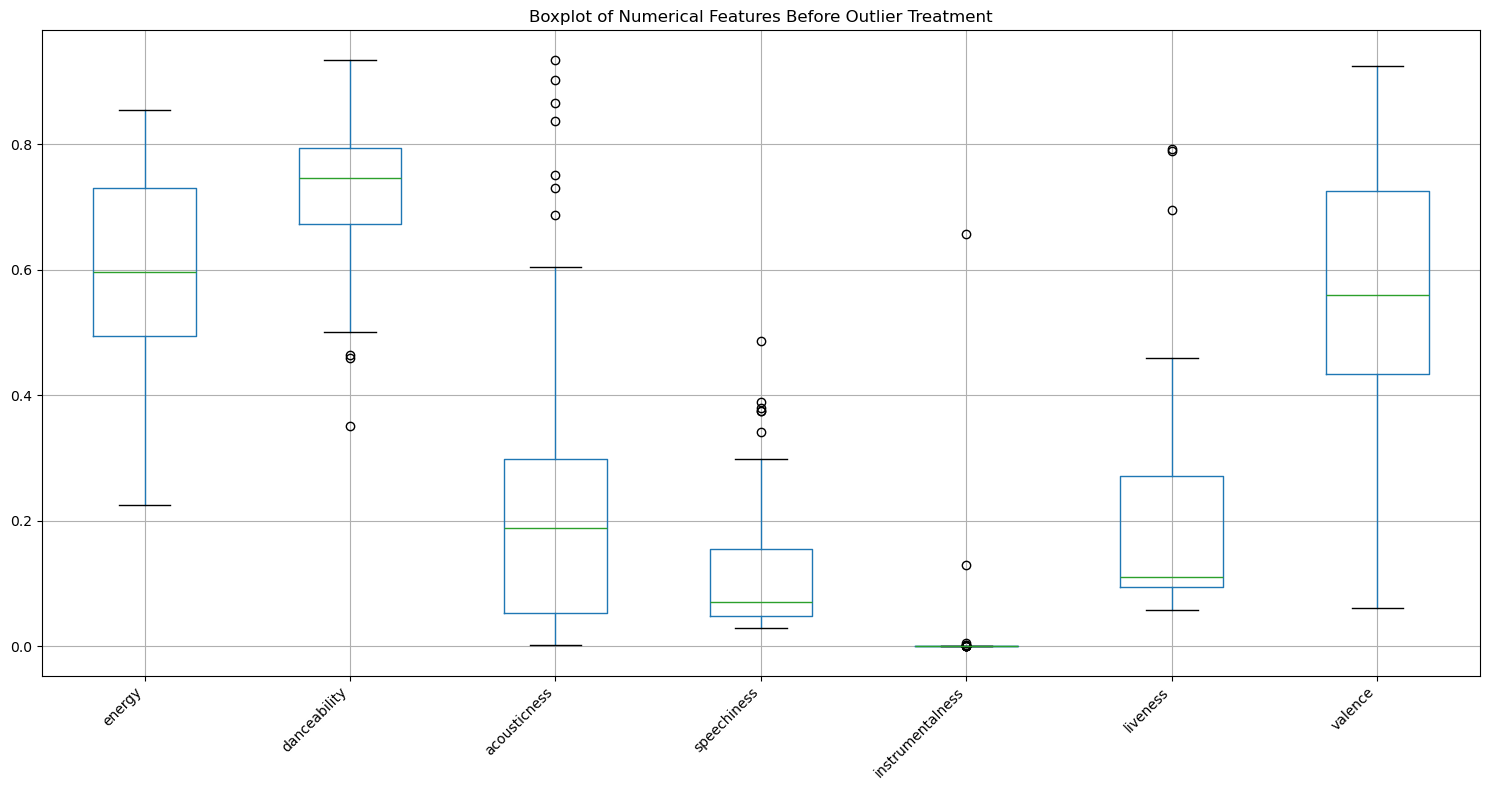

In [61]:
def outlier_treatment(df, feature):
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] > upper_bound, upper_bound,
                           np.where(df[feature] < lower_bound, lower_bound,
                                    df[feature]))

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features_ex = [col for col in numerical_features 
                         if col not in ["duration_ms", "tempo", "key", "loudness"]]

plt.figure(figsize=(15, 8))
df.boxplot(column=numerical_features_ex)
plt.title("Boxplot of Numerical Features Before Outlier Treatment")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Finally, if we would be forced to remove these outliers we could achieve that with running these functions:
```Python 
for feature in numerical_features:
    outlier_treatment(df, feature)
```
And we could create boxplot after outlier treatment with:
```Python 
plt.figure(figsize=(15, 8))
df.boxplot(column=numerical_features)
plt.title("Boxplot of Numerical Features After Outlier Treatment")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
```

# Exploratory data analysis
In this part we will perform EDA, by doing this we will gain insights into the dataset's characteristics, popularity of different artists and genres, and relationship between different audio features. We will be focusing in answering the questions from the provided list.
Or you can jump straight to [EDA Summary](#EDA-Summary)

In [62]:
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
categorical_features = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical features: {categorical_features}")
print(f"Numeric features: {numerical_features}")

Number of observations: 50
Number of features: 16
Categorical features: ['artist', 'album', 'track_name', 'track_id', 'genre']
Numeric features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [63]:
artist_counts = df["artist"].value_counts()
print("\nArtists with more than one popular track:\n", artist_counts[artist_counts > 1])
print("\nMost popular artist:", artist_counts.idxmax())
print("\nTotal unique artists in top 50:", artist_counts.count())


Artists with more than one popular track:
 artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

Most popular artist: Billie Eilish

Total unique artists in top 50: 40


In [64]:
album_counts = df["album"].value_counts()
print("\nAlbums with more than one popular track:\n", album_counts[album_counts > 1])
print("\nTotal unique albums in top 50:", album_counts.count())


Albums with more than one popular track:
 album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

Total unique albums in top 50: 45


In [65]:
print("\nTracks with danceability > 0.7:\n", df[df["danceability"] > 0.7]["track_name"].tolist())
print("\nTracks with danceability < 0.4:\n", df[df["danceability"] < 0.4]["track_name"].tolist())
print("\nTracks with loudness > -5:\n", df[df["loudness"] > -5]["track_name"].tolist())
print("\nTracks with loudness < -8:\n", df[df["loudness"] < -8]["track_name"].tolist())
print("\nLongest track:", df.loc[df["duration_ms"].idxmax()]["track_name"])
print("\nShortest track:", df.loc[df["duration_ms"].idxmin()]["track_name"])


Tracks with danceability > 0.7:
 ['Dance Monkey', 'The Box', 'Roses - Imanbek Remix', "Don't Start Now", 'ROCKSTAR (feat. Roddy Ricch)', 'death bed (coffee for your head)', 'Falling', 'Tusa', 'Blueberry Faygo', 'Intentions (feat. Quavo)', 'Toosie Slide', 'Say So', 'Memories', 'Life Is Good (feat. Drake)', 'Savage Love (Laxed - Siren Beat)', 'Breaking Me', 'everything i wanted', 'Señorita', 'bad guy', 'WAP (feat. Megan Thee Stallion)', 'Sunday Best', 'Godzilla (feat. Juice WRLD)', 'Break My Heart', 'Dynamite', 'Supalonely (feat. Gus Dapperton)', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Hawái', 'Ride It', 'goosebumps', 'RITMO (Bad Boys For Life)', 'THE SCOTTS', 'SICKO MODE']

Tracks with danceability < 0.4:
 ['lovely (with Khalid)']

Tracks with loudness > -5:
 ["Don't Start Now", 'Watermelon Sugar', 'Tusa', 'Circles', 'Before You Go', 'Say So', 'Adore You', 'Mood (feat. iann dior)', 'Break My Heart', 'Dynamite', 'Supalonely (feat. Gus Dapperton)', 'Rain On Me (with Ariana Gran

In [66]:
genre_counts = df["genre"].value_counts()
print("\nMost popular genre:", genre_counts.idxmax())
print("\nGenres with just one song:\n", genre_counts[genre_counts == 1].index.tolist())
print("\nTotal unique genres:", genre_counts.count())


Most popular genre: Pop

Genres with just one song:
 ['Nu-disco', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock', 'Pop rap', 'Hip-Hop/Trap', 'Dance-pop/Disco', 'Disco-pop', 'Dreampop/Hip-Hop/R&B', 'Alternative/reggaeton/experimental', 'Chamber pop']

Total unique genres: 16


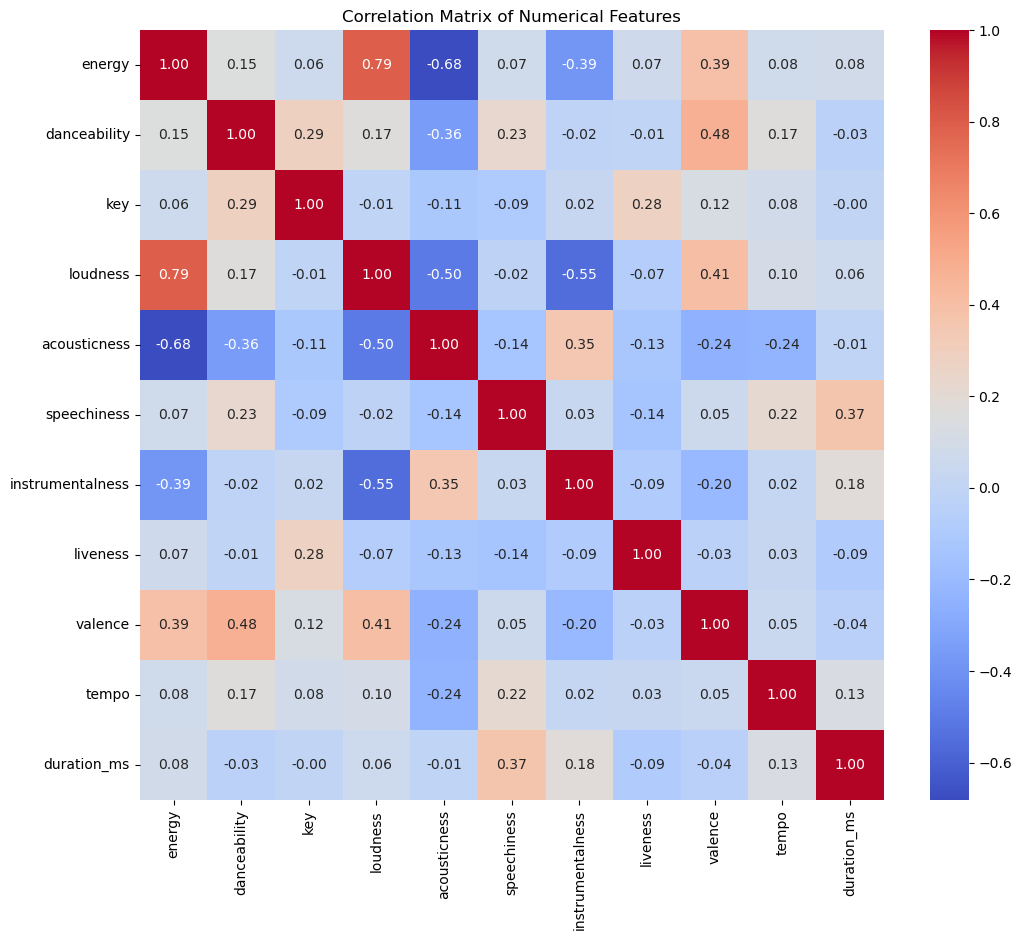


Strongly correlated features:
energy and loudness: 0.79
energy and acousticness: -0.68

Weakly/not correlated features:
energy and key: 0.06
energy and speechiness: 0.07
energy and liveness: 0.07
energy and tempo: 0.08
energy and duration_ms: 0.08
danceability and instrumentalness: -0.02
danceability and liveness: -0.01
danceability and duration_ms: -0.03
key and loudness: -0.01
key and speechiness: -0.09
key and instrumentalness: 0.02
key and tempo: 0.08
key and duration_ms: -0.00
loudness and speechiness: -0.02
loudness and liveness: -0.07
loudness and duration_ms: 0.06
acousticness and duration_ms: -0.01
speechiness and instrumentalness: 0.03
speechiness and valence: 0.05
instrumentalness and liveness: -0.09
instrumentalness and tempo: 0.02
liveness and valence: -0.03
liveness and tempo: 0.03
liveness and duration_ms: -0.09
valence and tempo: 0.05
valence and duration_ms: -0.04


In [67]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

print("\nStrongly correlated features:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.6:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {corr_value:.2f}")

print("\nWeakly/not correlated features:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) <= 0.1:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {corr_value:.2f}")

_Pearson correlation thresholds:_
- _0.8 to 1: very strong relationship_
- _0.6 to 0.8: strong relationship_
- _0.4 to 0.6: moderate relationship_
- _0.2 to 0.4: weak relationship_
- _0 to 0.2: very weak correlation or no correlation_

# Comparison of features between different genres
Let's take a look on how key features (such as danceability, loudness and acousticness) compare between most popular music genres. 

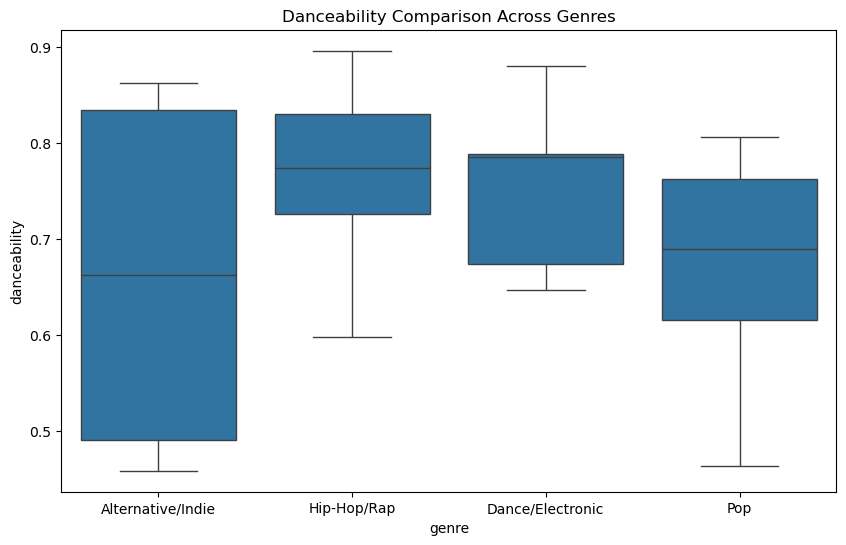

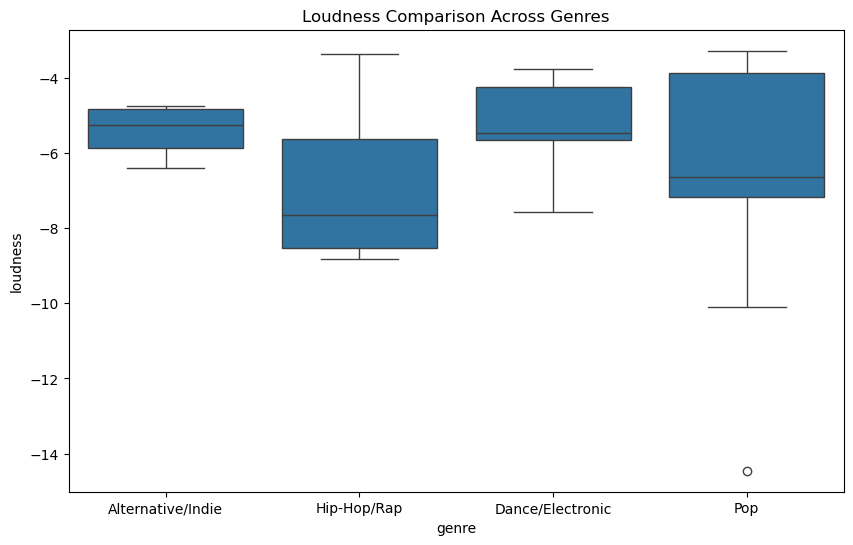

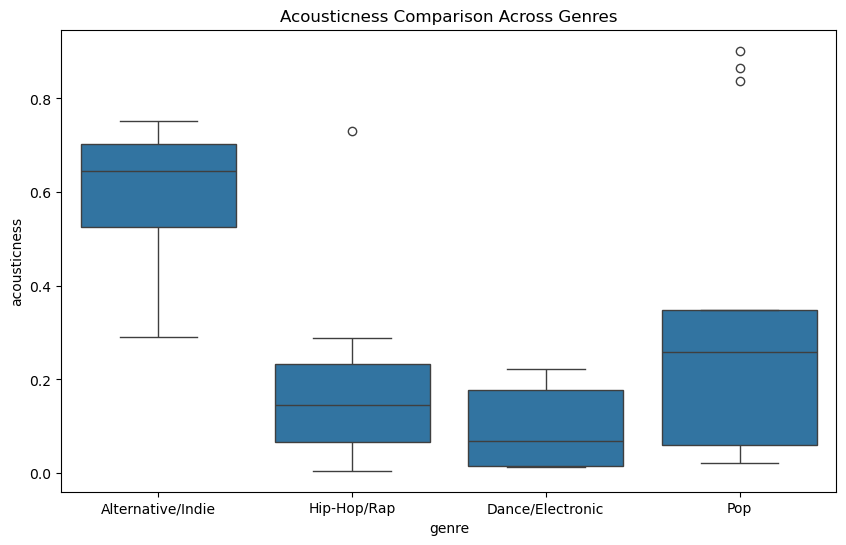

In [68]:
genres_to_compare = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
filtered_df = df[df["genre"].isin(genres_to_compare)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="genre", y="danceability", data=filtered_df)
plt.title("Danceability Comparison Across Genres")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="genre", y="loudness", data=filtered_df)
plt.title("Loudness Comparison Across Genres")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="genre", y="acousticness", data=filtered_df)
plt.title("Acousticness Comparison Across Genres")
plt.show()

# EDA Summary
| **Question** | **Answer** |
|-------------|-----------|
| **Number of observations** | 50 |
| **Number of features** | 16 |
| **Categorical features** | artist,</br> album,</br> track_name,</br> track_id,</br> genre |
| **Numeric features** | energy,</br> danceability,</br> key, loudness,</br> acousticness,</br> speechiness,</br> instrumentalness,</br> liveness,</br> valence,</br> tempo,</br> duration_ms |
| **Artists with more than one popular track** | Billie Eilish: 3 </br> Dua Lipa: 3 </br> Travis Scott: 3 </br> Justin Bieber: 2 </br> Harry Styles: 2 </br> Lewis Capaldi: 2 </br> Post Malone: 2 |
| **Most popular artist** | Billie Eilish |
| **Total unique artists in top 50** | 40 |
| **Albums with more than one popular track** | </br> Future Nostalgia: 3 </br> Hollywood's Bleeding: 2 </br> Fine Line: 2 </br> Changes: 2 |
| **Total unique albums in top 50** | 45 |
| **Tracks with danceability > 0.7** | Dance Monkey,</br> The Box,</br> Roses - Imanbek Remix,</br> Don't Start Now,</br> ROCKSTAR (feat. Roddy Ricch),</br> death bed (coffee for your head),</br> Falling,</br> Tusa,</br> Blueberry Faygo,</br> Intentions (feat. Quavo),</br> Toosie Slide,</br> Say So,</br> Memories,</br> Life Is Good (feat. Drake),</br> Savage Love (Laxed - Siren Beat),</br> Breaking Me,</br> everything i wanted,</br> Señorita,</br> bad guy,</br> WAP (feat. Megan Thee Stallion),</br> Sunday Best,</br> Godzilla (feat. Juice WRLD),</br> Break My Heart,</br> Dynamite,</br> Supalonely (feat. Gus Dapperton),</br> Sunflower - Spider-Man: Into the Spider-Verse,</br> Hawái,</br> Ride It,</br> goosebumps,</br> RITMO (Bad Boys For Life),</br> THE SCOTTS,</br> SICKO MODE |
| **Tracks with danceability < 0.4** | lovely (with Khalid) |
| **Tracks with loudness > -5** | Don't Start Now,</br> Watermelon Sugar,</br> Tusa,</br> Circles,</br> Before You Go,</br> Say So,</br> Adore You,</br> Mood (feat. iann dior),</br> Break My Heart,</br> Dynamite,</br> Supalonely (feat. Gus Dapperton),</br> Rain On Me (with Ariana Grande),</br> Sunflower - Spider-Man: Into the Spider-Verse,</br> Hawái,</br> Ride It,</br> goosebumps,</br> Safaera,</br> Physical,</br> SICKO MODE |
| **Tracks with loudness < -8** | death bed (coffee for your head),</br> Falling,</br> Toosie Slide,</br> Savage Love (Laxed - Siren Beat),</br> everything i wanted,</br> bad guy,</br> HIGHEST IN THE ROOM,</br> lovely (with Khalid),</br> If the World Was Ending - feat. Julia Michaels</br> |
| **Longest track** | SICKO MODE |
| **Shortest track** | Mood (feat. iann dior) |
| **Most popular genre** | Pop |
| **Genres with just one song** | Nu-disco,</br> R&B/Hip-Hop alternative,</br> Pop/Soft Rock,</br> Pop rap,</br> Hip-Hop/Trap,</br> Dance-pop/Disco,</br> Disco-pop,</br> Dreampop/Hip-Hop/R&B,</br> Alternative/reggaeton/experimental,</br> Chamber pop |
| **Total unique genres** | 16 |
| **Which features are strongly positively correlated?** | energy and loudness: 0.79 |
| **Which features are strongly negatively correlated?** | energy and acousticness: -0.68 |
| **Which features are not correlated?** | Weakly/not correlated features:</br>energy and key: 0.06,</br>energy and speechiness: 0.07,</br>energy and liveness: 0.07,</br>energy and tempo: 0.08,</br>energy and duration_ms: 0.08,</br>danceability and instrumentalness: -0.02,</br>danceability and liveness: -0.01,</br>danceability and duration_ms: -0.03,</br>key and loudness: -0.01,</br>key and speechiness: -0.09,</br>key and instrumentalness: 0.02,</br>key and tempo: 0.08,</br>key and duration_ms: -0.00,</br>loudness and speechiness: -0.02,</br>loudness and liveness: -0.07,</br>loudness and duration_ms: 0.06,</br>acousticness and duration_ms: -0.01,</br>speechiness and instrumentalness: 0.03,</br>speechiness and valence: 0.05,</br>instrumentalness and liveness: -0.09,</br>instrumentalness and tempo: 0.02,</br>liveness and valence: -0.03,</br>liveness and tempo: 0.03,</br>liveness and duration_ms: -0.09,</br>valence and tempo: 0.05,</br>valence and duration_ms: -0.04,</br>|
---


# Key insights and conclusion
**Key insights:**
- Most popular artist Billie Eilish
- Pop is dominant genre
- 40 unique artist and 45 unique albums
- Danceability > 0.7 is a common trait among many tracks, while only one track falls below 0.4 in danceability.
</br>

**Conclusion:** </br>
Overall, the data suggests that high-energy, loud, and danceable pop tracks dominate the charts, with a few exceptions leaning toward acoustic and softer music. The variety of genres highlights diversity, but pop remains the strongest influence.

# Suggestions for improvement
- Include more songs (either by including songs from different years or expanding list in general)
- Geographical data could be included.
- Analyze user engagement data (plays, likes, shares) for deeper insights.